In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pickle
from modules.utils import to_latex_table

In [2]:
figscale = 0.7
figscale_alt = 0.5
FIGSIZE_NORMAL = (14*figscale, 8*figscale)
FIGSIZE = (14*figscale_alt, 8*figscale_alt)

In [3]:
df = pd.read_pickle('..//data//extended_model_simulations.pkl')

In [4]:
df['does_work'] = df['action'].apply(lambda x: x > 0)

In [5]:

kids30 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 30) & (df['K_plus_20'] == 1)]['episode'])
kids25 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 25) & (df['K_plus_20'] == 1)]['episode'])
kids35 = set(df.loc[(df['K_minus'] == 0) & \
            (df['K'] == 1) & (df['Q'] == 35) & (df['K_plus_20'] == 1)]['episode'])
kids0 = set(df.loc[(df['Q'] == 35) & (df['K_plus'] == 0) & (df['K_plus_20'] == 0)]['episode'])

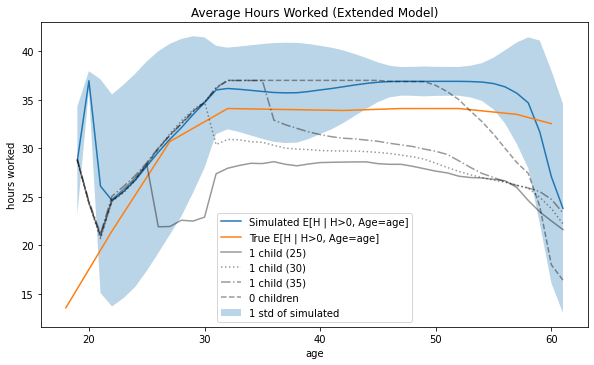

In [6]:
with open("..//data//women_hours_empirical", "rb") as f:
    women_hours_data = pickle.load(f)    

f, ax = plt.subplots(1,1, figsize=FIGSIZE_NORMAL)
ax.set_title("Average Hours Worked (Extended Model)")

standard = df.loc[df['action'] > 0].groupby('Q').mean()['action']
std = df.loc[df['action'] > 0].groupby('Q')['action'].std()

standard.plot(label='Simulated E[H | H>0, Age=age]')
plt.fill_between(standard.index, standard -std, standard + std, alpha=0.3, label='1 std of simulated')
plt.plot(range(18,61), women_hours_data[18:61], label='True E[H | H>0, Age=age]')

y25 = df.loc[df['episode'].isin(kids25)].groupby('Q')['action'].mean()
y25.plot(label='1 child (25)', color='black', alpha=0.4)
y30 = df.loc[df['episode'].isin(kids30)].groupby('Q')['action'].mean()
y30.plot(label='1 child (30)', color='black', alpha=0.4, ls='dotted')
y35 = df.loc[df['episode'].isin(kids35)].groupby('Q')['action'].mean()
y35.plot(label='1 child (35)', color='black', alpha=0.4, ls='-.')

y0 = df.loc[df['episode'].isin(kids0)].groupby('Q')['action'].mean()
y0.plot(label='0 children', color='black', alpha=0.4, ls='--')

ax.set_ylabel('hours worked')
ax.set_xlabel('age')

ax.legend()

f.savefig('..//figures//extended_model_average_hours')

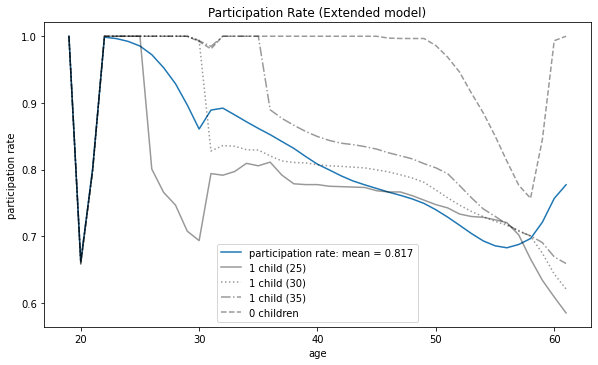

In [7]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE_NORMAL)
ax.set_title("Participation Rate (Extended model)")

    
_m = np.mean(df.groupby('Q').mean()['does_work'])

df.groupby('Q').mean()['does_work'].plot(label=f'participation rate: mean = {_m:.3f}')


y25 = df.loc[df['episode'].isin(kids25)].groupby('Q')['does_work'].mean()
y25.plot(label='1 child (25)', color='black', alpha=0.4)
y30 = df.loc[df['episode'].isin(kids30)].groupby('Q')['does_work'].mean()
y30.plot(label='1 child (30)', color='black', alpha=0.4, ls='dotted')
y35 = df.loc[df['episode'].isin(kids35)].groupby('Q')['does_work'].mean()
y35.plot(label='1 child (35)', color='black', alpha=0.4, ls='-.')

y0 = df.loc[df['episode'].isin(kids0)].groupby('Q')['does_work'].mean()
y0.plot(label='0 children', color='black', alpha=0.4, ls='--')

ax.set_ylabel('participation rate')
ax.set_xlabel('age')

ax.legend()

f.savefig('..//figures//extended_model_participation_rates')

0.7905583147551102 0.7631789960924238


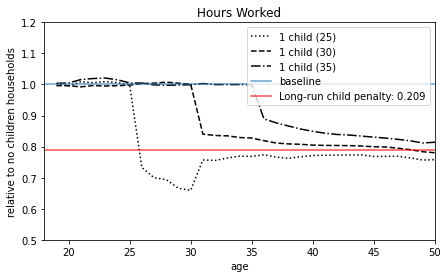

In [8]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Hours Worked")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['action'].mean()

y25 = (df.loc[df['episode'].isin(kids25)].groupby('Q')['action'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30)].groupby('Q')['action'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35)].groupby('Q')['action'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')


ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_hours_worked')


0.8514586226724234 0.8266733308905415


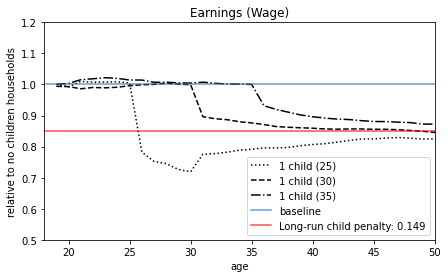

In [9]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Earnings (Wage)")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['W'].mean()

y25 = (df.loc[df['episode'].isin(kids25)].groupby('Q')['W'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30)].groupby('Q')['W'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35)].groupby('Q')['W'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

print(m_, m25)

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_earnings')


0.9340333247480833 0.9196137397009068


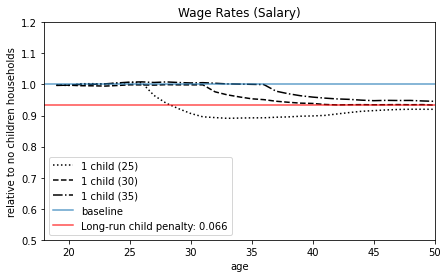

In [10]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Wage Rates (Salary)")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['S'].mean()

#standard.plot(label='0 børn')


y25 = (df.loc[df['episode'].isin(kids25)].groupby('Q')['S'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30)].groupby('Q')['S'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35)].groupby('Q')['S'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

print(m_, m25)


ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')


ax.legend()

f.savefig('..//figures//extended_model_event_wage_rates')


0.790597065068695 0.7631732986553039


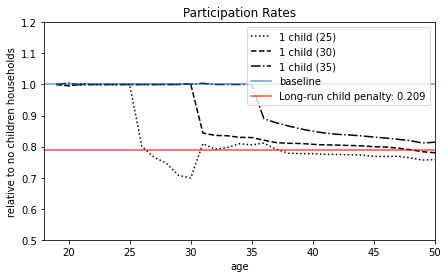

In [11]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Participation Rates")

standard = df.loc[df['episode'].isin(kids0)].groupby('Q')['does_work'].mean()

y25 = (df.loc[df['episode'].isin(kids25) ].groupby('Q')['does_work'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) ].groupby('Q')['does_work'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) ].groupby('Q')['does_work'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_participation_rates')


# Hours worked + Salary Conditional on Labour Force Participation

1.0771924608829957 1.0832356289769725


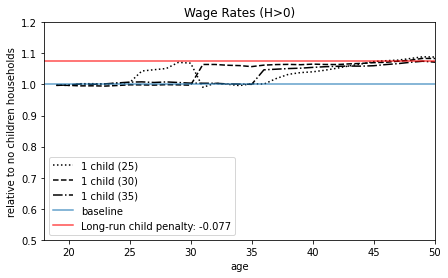

In [12]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Wage Rates (H>0)")

standard = df.loc[df['episode'].isin(kids0) & (df['action'] > 0)].groupby('Q')['S'].mean()

y25 = (df.loc[df['episode'].isin(kids25) & (df['action'] > 0)].groupby('Q')['S'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) & (df['action'] > 0)].groupby('Q')['S'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) & (df['action'] > 0)].groupby('Q')['S'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_wage_rates_H>0')


1.0771743461092258 1.0832387339570437


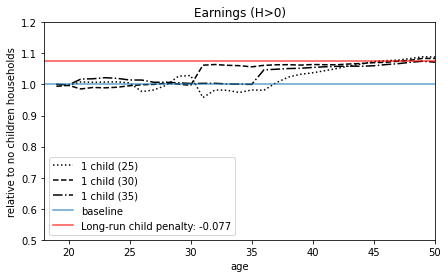

In [13]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Earnings (H>0)")

standard = df.loc[df['episode'].isin(kids0) & (df['action'] > 0)].groupby('Q')['W'].mean()

y25 = (df.loc[df['episode'].isin(kids25) & (df['action'] > 0)].groupby('Q')['W'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) & (df['action'] > 0)].groupby('Q')['W'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) & (df['action'] > 0)].groupby('Q')['W'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_earnings_H>0')



### Hours worked alternative

0.9999528477401132 1.000007408860492


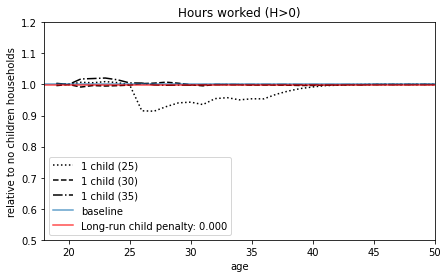

In [14]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.set_title("Hours worked (H>0)")



standard = df.loc[df['episode'].isin(kids0) & (df['action'] > 0)].groupby('Q')['action'].mean()

y25 = (df.loc[df['episode'].isin(kids25) & (df['action'] > 0)].groupby('Q')['action'].mean() / standard)
y25.plot(label='1 child (25)', color='black', ls='dotted')
y30 = (df.loc[df['episode'].isin(kids30) & (df['action'] > 0)].groupby('Q')['action'].mean() / standard)
y30.plot(label='1 child (30)', color='black', ls='--')
y35 = (df.loc[df['episode'].isin(kids35) & (df['action'] > 0)].groupby('Q')['action'].mean() / standard)
y35.plot(label='1 child (35)', color='black', ls='-.')

m25 = y25.loc[(y25.index > 45) & (y25.index <= 50)].mean()
m30 = y30.loc[(y30.index > 45) & (y30.index <= 50)].mean()
m35 = y35.loc[(y35.index > 45) & (y25.index <= 50)].mean()

m_ = np.mean([m25, m30, m35])

print(m_, m25)
ax.axhline(y=1, label='baseline', alpha=0.7)
ax.axhline(m_, alpha=0.7, color='red', label=f'Long-run child penalty: {1 - m_:.3f}')

ax.set_xlim(18, 50)
ax.set_ylim(0.5, 1.2)

ax.set_xlabel('age')
ax.set_ylabel('relative to no children households')

ax.legend()

f.savefig('..//figures//extended_model_event_hours_worked_H>0')


In [15]:
df_comparison = pd.DataFrame([
    {'value': 'Earnings', 'Kleven et al.': 0.194, 'result': 0.149, 'result ($H > 0$)': -0.077 },
    {'value': 'Hours worked', 'Kleven et al.': 0.097, 'result': 0.209, 'result ($H > 0$)': 0.000 },
    {'value': 'Participation rates', 'Kleven et al.': 0.130, 'result': 0.209 , 'result ($H > 0$)': None },
    {'value': 'Wage rates', 'Kleven et al.': 0.194, 'result': 0.066, 'result ($H > 0$)': - 0.077 },
])

df_comparison.rename({'value':' '}, inplace=True, axis=1)
to_latex_table('model_extended_results_comparison', df_comparison, directory = '..//tables',index=False, nr_decimals=3)


In [16]:
df_comparison

,,Kleven et al.,result,result ($H > 0$)
0,Earnings,0.194,0.149,-0.077
1,Hours worked,0.097,0.209,0.000
2,Participation rates,0.130,0.209,NaN
3,Wage rates,0.194,0.066,-0.077


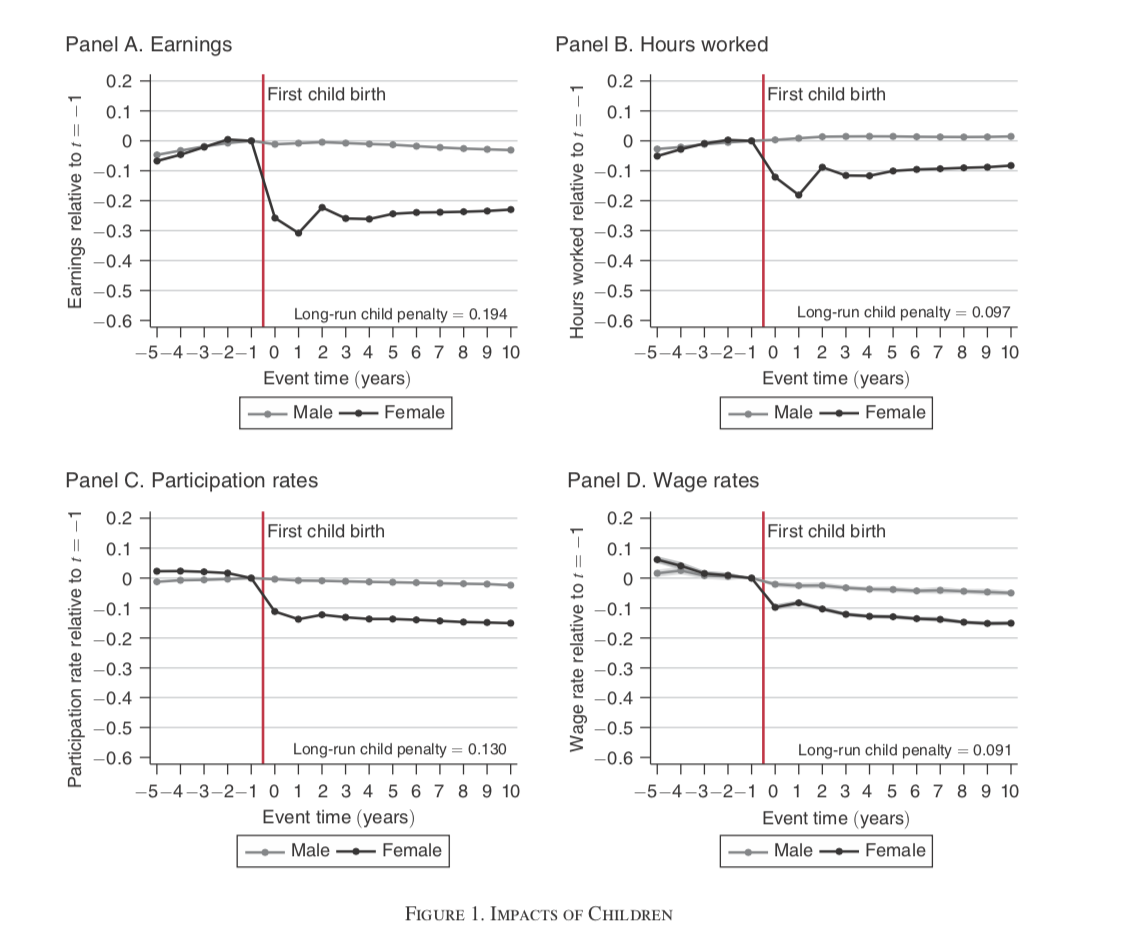

# Time use when multiple kids

In [148]:
from scipy.stats import linregress

In [203]:
tmp = df.loc[df['E'] < 0.5]

start_time, buckets_L, buckets_A, counts, start_times, end_times, mid_times = 0, list(), list(), \
                list(), list(), list(), list()

for end_time in [0.001, 5, 10, 15, 20, 25, 30]:
    _res = tmp.loc[(tmp['J'] >= start_time) & (tmp['J'] < end_time) ][['action', 'L']]
    counts.append(len(_res))
    _res = _res.mean()
    buckets_L.append(float(_res['L'])),buckets_A.append(float(_res['action']))
    start_times.append(start_time), end_times.append(end_time), mid_times.append((start_time + end_time) / 2)
    start_time = end_time
    

In [204]:
buckets_L, buckets_A, counts

([138.20285108080296,
  136.7644047660645,
  136.9298819889795,
  127.42450332010635,
  125.2757177714004,
  118.78314153195288,
  113.23878536922015],
 [29.79714891919703,
  27.7355952339355,
  24.070118011020497,
  29.248870362205565,
  25.724282228599602,
  28.24747229715306,
  27.761214630779847],
 [4475145, 1602664, 695613, 748470, 79099, 51529, 4347])

In [206]:
linreg_ts = linregress(tmp['J'], tmp['L'])
linreg = linregress(mid_times, buckets_L)
linreg.slope, linreg.intercept, '::', linreg_ts.slope, linreg_ts.intercept

(-0.9316475962996457,
 140.0669287347273,
 '::',
 -0.7784543204769708,
 138.63984880703316)

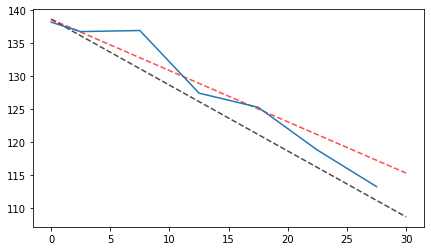

In [207]:
f, ax1 = plt.subplots(1,1, figsize=FIGSIZE)

xx = np.linspace(0, 30)
degree45 = list(map(lambda x: linreg_ts.intercept - x, xx))
regress = list(map(lambda x: linreg.slope * x + linreg.intercept, xx ))
regress_ts = list(map(lambda x: linreg_ts.slope * x + linreg_ts.intercept, xx ))

ax1.plot(xx, degree45, color = 'black', ls='--', alpha=0.7)
ax1.plot(xx, regress_ts, color='red', ls='--', alpha=0.7)

ax1.plot(pd.Series(mid_times), pd.Series(buckets_L))

In [208]:
linreg_ts = linregress(tmp['J'], tmp['action'])
linreg = linregress(mid_times, buckets_A)
linreg.slope, linreg.intercept, '::', linreg_ts.slope, linreg_ts.intercept

(-0.01814204521217562,
 27.745357699147444,
 '::',
 -0.22154567952303542,
 29.36015119296685)

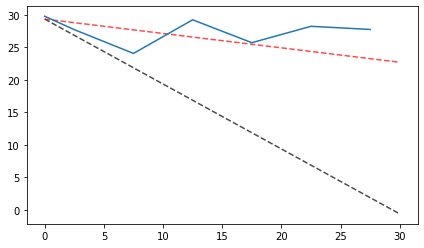

In [265]:
f, ax1 = plt.subplots(1,1, figsize=FIGSIZE)

xx = np.linspace(0, 30)
_degree45 = list(map(lambda x: linreg_ts.intercept - x, xx))
_regress = list(map(lambda x: linreg.slope * x + linreg.intercept, xx ))
_regress_ts = list(map(lambda x: linreg_ts.slope * x + linreg_ts.intercept, xx ))

ax1.plot(xx, _degree45, color = 'black', ls='--', alpha=0.7)
ax1.plot(xx, _regress_ts, color='red', ls='--', alpha=0.7)
#ax1.plot(xx, np.array(_regress_ts) + np.array(regress_ts), color='red', ls='--', alpha=0.7)


ax1.plot(pd.Series(mid_times), pd.Series(buckets_A))



In [179]:
f, ax1 = plt.subplots(1,1, figsize=FIGSIZE)

xx = np.linspace(0, 30)
degree45 = list(map(lambda x: linreg_ts.intercept - x, xx))
regress = list(map(lambda x: linreg.slope * x + linreg.intercept, xx ))
regress_ts = list(map(lambda x: linreg_ts.slope * x + linreg_ts.intercept, xx ))

ax1.plot(xx, degree45, color = 'black', ls='--', alpha=0.7)
ax1.plot(xx, regress_ts, color='red', ls='--', alpha=0.7)

ax1.plot(pd.Series(mid_times), pd.Series(buckets_L))

113.65714599284385

In [139]:
df.loc[(df['E'] < 0.5 ) & (df['K'] == 0.0 ) & (df['K_plus'] == 1.0 ) & (df['Q'] > 19 ) & (df['Q'] < 50)]['Q'].max()

49.0

In [136]:
df.loc[df['episode'] == 6672.0]

,Q,G,K,Z,beta_L,E_prob,E,b1,b2,b3,...,J,transfer,L_plus,E_plus,action_plus,educ_change,K_plus,K_minus,K_plus_20,does_work
286896,19.0,2.000000,0.0,-8.790970,24.489796,0.938127,1.0,0.0,0.0,0.0,...,0.0,1400,131.0,1.0,0.0,0,0.0,2.0,0.0,True
286897,20.0,2.000000,0.0,-32.233440,24.489796,0.939794,1.0,0.0,0.0,0.0,...,0.0,1400,168.0,0.0,0.0,1,0.0,0.0,0.0,False
286898,21.0,1.582000,0.0,-12.260773,24.489796,0.931079,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,False
286899,22.0,2.251362,0.0,-12.305427,24.489796,0.926240,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True
286900,23.0,2.780827,0.0,11.857788,24.489796,0.882539,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True
286901,24.0,3.199634,0.0,-7.966114,24.489796,0.877245,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True
286902,25.0,3.530911,0.0,18.588684,24.489796,0.852701,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True
286903,26.0,3.792950,0.0,10.754541,24.489796,0.858312,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True
286904,27.0,4.000224,0.0,5.965707,24.489796,0.813736,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True
286905,28.0,4.164177,0.0,17.151643,24.489796,0.755801,0.0,0.0,0.0,0.0,...,0.0,0,131.0,0.0,37.0,0,0.0,0.0,0.0,True


In [223]:
from scipy.stats import linregress
from scipy.optimize import minimize

In [234]:
tmp = df.loc[df['E'] < 0.5][['E', 'J', 'L', 'action']]

In [235]:
tmp['E_time'] = tmp['E'] * 37
tmp['omega'] = 7 * 24 # total time in one week

In [263]:

def objective(beta):
    
    l = tmp['J'] - (tmp['omega'] - beta * tmp['J'] - (1 - beta) * tmp['action'])
    print(np.mean(l))
    res = np.mean((tmp['J'] - l)**2)
    return res

def constraint(beta):
    return 1 - np.sum(beta) 

In [264]:
xx = np.linspace(0, 1)
yy = list(map(objective, xx))

-136.4541162201198
-136.98330628558395
-137.51249635104787
-138.04168641651196
-138.57087648197597
-139.10006654744018
-139.62925661290424
-140.15844667836825
-140.68763674383226
-141.21682680929632
-141.74601687476036
-142.2752069402244
-142.80439700568854
-143.33358707115246
-143.8627771366167
-144.3919672020807
-144.92115726754457
-145.45034733300872
-145.97953739847276
-146.50872746393665
-147.03791752940094
-147.56710759486535
-148.0962976603291
-148.62548772579316
-149.15467779125711
-149.68386785672135
-150.21305792218533
-150.74224798764945
-151.27143805311317
-151.8006281185775
-152.3298181840418
-152.8590082495058
-153.3881983149699
-153.917388380434
-154.44657844589787
-154.97576851136174
-155.5049585768261
-156.0341486422899
-156.56333870775413
-157.09252877321802
-157.621718838682
-158.1509089041462
-158.68009896961036
-159.2092890350744
-159.7384791005384
-160.26766916600246
-160.7968592314662
-161.3260492969307
-161.85523936239443
-162.3844294278587


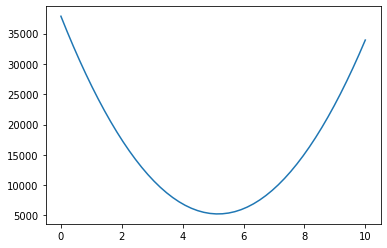

In [259]:
plt.plot(xx, yy)

In [266]:
df.columns

Index(['Q', 'G', 'K', 'Z', 'beta_L', 'E_prob', 'E', 'b1', 'b2', 'b3', 'b4',
       'c1', 'c2', 'c3', 'c4', 'action', 'scaled_reward', 'episode', 'Y', 'L',
       'W', 'S', 'M', 'J', 'transfer', 'L_plus', 'E_plus', 'action_plus',
       'educ_change', 'K_plus', 'K_minus', 'K_plus_20', 'does_work'],
      dtype='object')

In [386]:
reg_df = df[['E', 'action', 'W', 'J', 'transfer', 'M', 'L', 'Q']]

In [359]:
from sklearn.preprocessing import PolynomialFeatures

In [360]:
import statsmodels.api as sm

In [361]:
reg_df

,E,action,W,J,transfer,M,L,Q
0,1.0,25.0,3865.877372,0.0,1400,2525.443329,106.0,19.0
1,1.0,37.0,6204.158791,0.0,1400,3129.308579,94.0,20.0
2,1.0,15.0,2786.226498,0.0,1400,3779.568121,116.0,21.0
3,1.0,15.0,3154.954038,0.0,1400,4471.044000,116.0,22.0
4,1.0,15.0,3114.947328,0.0,1400,4998.613712,116.0,23.0
...,...,...,...,...,...,...,...,...
8599995,0.0,15.0,3849.660102,0.0,0,10873.032000,153.0,57.0
8599996,0.0,15.0,2879.143777,0.0,0,10668.009238,153.0,58.0
8599997,0.0,15.0,2288.302847,0.0,0,10453.835832,153.0,59.0
8599998,0.0,15.0,1800.000000,0.0,0,10230.791674,153.0,60.0


In [387]:
cols = ['E', 'W', 'J','transfer', 'M', 'Q']
new_cols = ['const']

reg_df['M'] = reg_df['M'] / 1000
reg_df['W'] = reg_df['W'] / 1000


for col in cols:
    

    new_col = f'{col}^2'
    reg_df[new_col] = reg_df[col]**2
    new_cols += [col, new_col]


/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A

In [388]:
reg_df = sm.add_constant(reg_df, prepend=False) 

mod = sm.OLS(reg_df[['action']], reg_df[new_cols])

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 action   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.931e+07
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        11:28:56   Log-Likelihood:            -2.1796e+07
No. Observations:             8600000   AIC:                         4.359e+07
Df Residuals:                 8599989   BIC:                         4.359e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.8894      0.350    291.084      0.000     101.203     102.575
E          -3.446e-06   7.82e-09   -440.852      0.000   -3.46e-06   -3.43e-06
E^2        -3.445e-06   7.82e-09   -440.752      0.000   -3.46e-06   -3.43e-06
W              5.8544      0.001   8376.695      0.000       5.853       5.856
W^2           -0.2287    4.5e-05  -5075.648      0.000      -0.229      -0.229
J             -0.2041      0.001   -290.418      0.000      -0.205      -0.203
J^2            0.0092   4.47e-05    205.667      0.000       0.009       0.009
transfer      -0.0032    7.3e-06   -440.750      0.000      -0.003      -0.003
transfer^2  1.043e-06   3.37e-09    309.238      0.000    1.04e-06    1.05e-06
M              3.6674      0.020    181.584      0.000       3.628       3.707
M^2            0.1712      0.000    364.083      0.000       0.170       0.172
Q             -6.7503      0.026   -256.573      0.000      -6.802      -6.699
Q^2            0.0688      0.000    253.236      0.000       0.068       0.069
==============================================================================
Omnibus:                  2706250.721   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13965853.030
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                       8.544   Cond. No.                     3.36e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.1e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [410]:
xx = np.linspace(0, 20)
yy = list(map(lambda x: - 0.20 * x + 0.009 * x**2, xx))

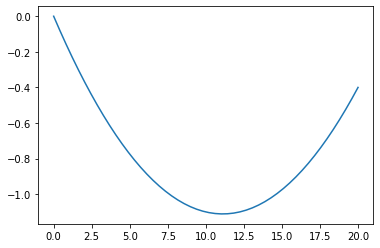

In [411]:
plt.plot(xx, yy)
#plt.plot(xx, xx, color='red', ls = '--')

In [339]:
res.summary().as_latex()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}    &      action      & \\textbf{  R-squared:         } &      0.956    \\\\\n\\textbf{Model:}            &       OLS        & \\textbf{  Adj. R-squared:    } &      0.956    \\\\\n\\textbf{Method:}           &  Least Squares   & \\textbf{  F-statistic:       } &  2.335e+07    \\\\\n\\textbf{Date:}             & Wed, 27 May 2020 & \\textbf{  Prob (F-statistic):} &      0.00     \\\\\n\\textbf{Time:}             &     11:08:22     & \\textbf{  Log-Likelihood:    } & -2.1933e+07   \\\\\n\\textbf{No. Observations:} &     8600000      & \\textbf{  AIC:               } &  4.387e+07    \\\\\n\\textbf{Df Residuals:}     &     8599991      & \\textbf{  BIC:               } &  4.387e+07    \\\\\n\\textbf{Df Model:}         &           8      & \\textbf{                     } &               \\\\\n\\bottomrule\n\\end{tabular}\n\\begin{tabular}{lcccccc}\n                    & \\textbf{coef} & \\textbf{std err} & \\textb